# Dump or Delete ? 

### 2.4 completed functions - duplicated above, added below for quick reference
- featuretest(clip_data)
- power_spectra_welch_axis(rawdata,fm,fM)
- HPfilter_testclip(clip_data,cutoff=0.75,ftype='highpass')

In [ ]:
def featuretest(clip_data):
    """
    Extract features from a simple clip of a single trial and sensor
    Input: simple clip without trial or sensor dict keys
    Output: feature matrix from all clips from given subject and scores for each clip
    Column names separate for acc and gyro data.
    """
    
    features_list = ['meanX','meanY','meanZ','rangeX','rangeY','rangeZ','iqrX','iqrY','iqrZ',
                     'stddev_X','stddev_Y','stddev_Z','skewX','skewY','skewZ','kurtX','kurtY','kurtZ',
                     'hist1_X','hist2_X','hist3_X','hist4_X',
                     'hist1_Y','hist2_Y','hist3_Y','hist4_Y',
                     'hist1_Z','hist2_Z','hist3_Z','hist4_Z',
                     #Moments of derivative: mean, SD, skew, kurtosis
                     'mean_derivative_x','mean_derivative_y','mean_derivative_z',
                     'std_derivative_x','std_derivative_y','std_derivative_z',
                     'skew_derivative_x','skew_derivative_y','skew_derivative_z',
                     'kurt_derivative_x','kurt_derivative_y','kurt_derivative_z',
                     'mean_squared_norm','sum_stddev',
                     'xcorr_XY','xcorr_XZ','xcorr_YZ',
                     'crossprod_raw_xy','crossprod_raw_xz','crossprod_raw_yz',
                     'crossprod_norm_xy','crossprod_norm_xz','crossprod_norm_yz',
                     'abs_crossprod_raw_xy','abs_crossprod_raw_xz','abs_crossprod_raw_yz',
                     'abs_crossprod_norm_xy','abs_crossprod_norm_xz','abs_crossprod_norm_yz',
                     'PSD_mean_X','PSD_mean_Y','PSD_mean_Z',
                     'PSD_std_X','PSD_std_Y','PSD_std_Z',
                     'PSD_skew_X','PSD_skew_Y','PSD_skew_Z',
                     'PSD_kur_X','PSD_kur_Y','PSD_kur_Z',
                     # mean power 20 bins
                     # x axis
                     'meanpower_bin1_x','meanpower_bin2_x','meanpower_bin3_x','meanpower_bin4_x',
                     'meanpower_bin5_x','meanpower_bin6_x','meanpower_bin7_x','meanpower_bin8_x',
                     'meanpower_bin9_x','meanpower_bin10_x','meanpower_bin11_x','meanpower_bin12_x',
                     'meanpower_bin13_x','meanpower_bin14_x','meanpower_bin15_x','meanpower_bin16_x',
                     'meanpower_bin17_x','meanpower_bin18_x','meanpower_bin19_x','meanpower_bin20_x',
                     # y axis
                     'meanpower_bin1_y','meanpower_bin2_y','meanpower_bin3_y','meanpower_bin4_y',
                     'meanpower_bin5_y','meanpower_bin6_y','meanpower_bin7_y','meanpower_bin8_y',
                     'meanpower_bin9_y','meanpower_bin10_y','meanpower_bin11_y','meanpower_bin12_y',
                     'meanpower_bin13_y','meanpower_bin14_y','meanpower_bin15_y','meanpower_bin16_y',
                     'meanpower_bin17_y','meanpower_bin18_y','meanpower_bin19_y','meanpower_bin20_y',
                     # z axis
                     'meanpower_bin1_z','meanpower_bin2_z','meanpower_bin3_z','meanpower_bin4_z',
                     'meanpower_bin5_z','meanpower_bin6_z','meanpower_bin7_z','meanpower_bin8_z',
                     'meanpower_bin9_z','meanpower_bin10_z','meanpower_bin11_z','meanpower_bin12_z',
                     'meanpower_bin13_z','meanpower_bin14_z','meanpower_bin15_z','meanpower_bin16_z',
                     'meanpower_bin17_z','meanpower_bin18_z','meanpower_bin19_z','meanpower_bin20_z',]


    #cycle through all clips for current trial and save dataframe of features for current trial and sensor
    features = []

    rawdata = clip_data

    #range on each axis
    min_xyz = np.min(rawdata,axis=0)
    max_xyz = np.max(rawdata,axis=0)
    r = np.asarray(max_xyz-min_xyz)

    #Moments on each axis - mean, std dev, skew, kurtosis
    mean = np.asarray(np.mean(rawdata,axis=0))
    # np.std default ddof=0 as default so changed to 1 to match matlab
    std = np.asarray(np.std(rawdata,axis=0, ddof=1))
    sk = skew(rawdata)
    # kurtosis has difference of +3 with matlab feature, thus the offset
    kurt = kurtosis(rawdata)+3

    #Cross-correlation between axes pairs
    xcorr_xy = np.corrcoef(rawdata.iloc[:,0],rawdata.iloc[:,1])[0][1]
    xcorr_xz = np.corrcoef(rawdata.iloc[:,0],rawdata.iloc[:,2])[0][1]
    xcorr_yz = np.corrcoef(rawdata.iloc[:,1],rawdata.iloc[:,2])[0][1]
    xcorr = np.array([xcorr_xy, xcorr_xz, xcorr_yz])

    # interquartile range
    iqrange = iqr(rawdata,axis=0)
    
    # histogram of z-score values
    hist = rawdata-np.mean(rawdata)/np.std(rawdata,ddof=1)
    hist_z_scores_x = np.histogram(hist.iloc[:,0],bins=4, range=(-2,2))
    hist_z_scores_y = np.histogram(hist.iloc[:,1], bins=4, range=(-2,2))
    hist_z_scores_z = np.histogram(hist.iloc[:,2], bins=4, range=(-2,2))
    
    hist_z_scores = np.concatenate((hist_z_scores_x[0], hist_z_scores_y[0], hist_z_scores_z[0]), axis=None)

    # derivative - for 3 axis
    derivative = np.diff(rawdata, axis=0)
    # mean of derivative
    mean_derivative = np.mean(derivative,axis=0)
    # std dev of derivative
    std_derivative = np.std(derivative,axis=0)
    # skewness of derivative
    skew_derivative = skew(derivative,axis=0)
    # kurtosis of derivative
        # added offset +3
    kurt_derivative = kurtosis(derivative,axis=0)+3
    moments_of_derivative = np.concatenate((mean_derivative,std_derivative,skew_derivative,kurt_derivative), axis=None)

    # sum of xyz std dev
    sum_stddev = np.array([np.sum(std)])

    # mean of the squared norm
    mean_squared_norm = np.array([np.mean(np.mean(np.square(rawdata)))])

    # normalize values (divided by acc norm) to get cross products
    # The norm should sum across xyz axis at each instance of time
    normdenominator = np.ones((len(rawdata.columns),1))*np.array(np.sqrt(np.sum(np.square(rawdata),axis=1)))
    norm = rawdata/normdenominator.T
    
    # cross products with raw and norm data
    crossprod_norm_xy = np.nanmean(norm.iloc[:,0]*norm.iloc[:,1])
    crossprod_norm_xz = np.nanmean(norm.iloc[:,0]*norm.iloc[:,2])
    crossprod_norm_yz = np.nanmean(norm.iloc[:,1]*norm.iloc[:,2])
    abs_crossprod_norm_xy = np.abs(crossprod_norm_xy)
    abs_crossprod_norm_xz = np.abs(crossprod_norm_xz)
    abs_crossprod_norm_yz = np.abs(crossprod_norm_yz)
    crossprod_raw_xy = np.nanmean(rawdata.iloc[:,0]*rawdata.iloc[:,1])
    crossprod_raw_xz = np.nanmean(rawdata.iloc[:,0]*rawdata.iloc[:,2])
    crossprod_raw_yz = np.nanmean(rawdata.iloc[:,1]*rawdata.iloc[:,2])
    abs_crossprod_raw_xy = np.abs(crossprod_raw_xy)
    abs_crossprod_raw_xz = np.abs(crossprod_raw_xz)
    abs_crossprod_raw_yz = np.abs(crossprod_raw_yz)
    crossprod = np.array([crossprod_raw_xy, crossprod_raw_xz, crossprod_raw_yz,
                          crossprod_norm_xy, crossprod_norm_xz, crossprod_norm_yz,
                          abs_crossprod_raw_xy, abs_crossprod_raw_xz, abs_crossprod_raw_yz,
                          abs_crossprod_norm_xy, abs_crossprod_norm_xz, abs_crossprod_norm_yz])
    
    # High pass filter before passing to PSD (to compare with Matlab process)
    rawdata = HPfilter_testclip(rawdata)
    
    # power spectral density (PSD)
# changed fm=0, to fm=1 like Andrew's code
    Pxx = power_spectra_welch_axis(rawdata,fm=0,fM=10)
    #moments of PSD
    Pxx_moments = np.array([np.nanmean(Pxx.iloc[:,0].values),np.nanmean(Pxx.iloc[:,1].values),np.nanmean(Pxx.iloc[:,2].values),
            np.nanstd(Pxx.iloc[:,0].values),np.nanstd(Pxx.iloc[:,1].values),np.nanstd(Pxx.iloc[:,2].values),
            skew(Pxx.iloc[:,0].values),skew(Pxx.iloc[:,1].values),skew(Pxx.iloc[:,2].values),
            kurtosis(Pxx.iloc[:,0].values),kurtosis(Pxx.iloc[:,1].values),kurtosis(Pxx.iloc[:,2].values)])
########################
    # Mean power in 0.5 Hz bins between 0 and 10 Hz (x, y, z)
    binedges = np.arange(0,10.5,0.5)
    powerbin_df = Pxx.groupby(pd.cut(Pxx.index, bins=binedges)).mean().fillna(0)
    powerbinarray = np.concatenate((powerbin_df.iloc[:,0],powerbin_df.iloc[:,1],powerbin_df.iloc[:,2]), axis=None)

#     # Andrew's mean PSD binning code
#     #power spectra averaged within bins
#     fm = 1; fM = 10; nbins = 10 #frequency bins
# # figure x=Pxx ?
#     Fs = np.mean(1/(np.diff(Pxx.index)/1000)) # sampling rate in clip
#     n = Pxx.size
#     timestep = 1/Fs
#     bin1 = int(timestep*n*fm)
#     bin2 = int(timestep*n*fM)
#     bins = np.linspace(bin1,bin2,nbins,dtype=int) #sample indices
#     deltab = int(0.5*np.diff(bins)[0]) #half the size of bin (in samples)
#     Pxxm = []
#     for i in bins:
#         start = int(max(i-deltab,bins[0]))
#         end = int(min(i+deltab,bins[-1]))
#         Pxxm.append(np.mean(Pxx[start:end]))
#     Pxxm = np.asarray(Pxxm)
# #     plt.plot(bins/(timestep*n),Pxxm)
#     powerbinarray = Pxxm
########################################
    #Assemble features in array
    X = np.concatenate((mean,r,iqrange,std,sk,kurt,hist_z_scores,moments_of_derivative,
                        mean_squared_norm,sum_stddev,xcorr,crossprod,Pxx_moments,powerbinarray))
    features.append(X)
    
    F = np.asarray(features) #feature matrix for all clips from current trial

    features = pd.DataFrame(data=F,columns=features_list,dtype='float32')

    return features

def power_spectra_welch_axis(rawdata,fm,fM):
    """Compute PSD on each axis then combine into a dataframe"""
    x = rawdata.iloc[:,0]
    y = rawdata.iloc[:,1]
    z = rawdata.iloc[:,2]
    # number of samples in clip
    n = len(x)
    # sampling rate in clip
    Fs = np.mean(1/(np.diff(x.index)/1000))
    
    # adjusted params to match frequency using scipy.welch with matlab.pwelch
#     fx,Pxx_denX = welch(x,fs=30,nperseg=256,detrend=False)
#     fy,Pxx_denY = welch(y,fs=30,nperseg=256,detrend=False)
#     fz,Pxx_denZ = welch(z,fs=30,nperseg=256,detrend=False)
    # added param: detrend=False
    fx,Pxx_denX = welch(x,Fs,nperseg=min(256,n),detrend=False)
    fy,Pxx_denY = welch(y,Fs,nperseg=min(256,n),detrend=False)
    fz,Pxx_denZ = welch(z,Fs,nperseg=min(256,n),detrend=False)
    
    #return PSD in desired interval of freq
    inds = (fx<=fM)&(fx>=fm)
    f=fx[inds]
    Pxx_denX=Pxx_denX[inds]
    Pxx_denY=Pxx_denY[inds]
    Pxx_denZ=Pxx_denZ[inds]
    Pxx_den = {'PSD_X':Pxx_denX,'PSD_Y':Pxx_denY,'PSD_Z':Pxx_denY}
    Pxxdf = pd.DataFrame(data=Pxx_den,index=f)

    return Pxxdf

# modified to take testclip
def HPfilter_testclip(clip_data,cutoff=0.75,ftype='highpass'):
    """
    Highpass (or lowpass) filter data. HP to remove gravity (offset - limb orientation) from accelerometer 
    data from each visit (trial)
    
    Input: Activity dictionary, cutoff freq [Hz], task, sensor location and type of filter 
    (highpass or lowpass).
    """
    rawdata = clip_data
#     if rawdata.empty is True: #skip if no data for current sensor
#         continue
    idx = rawdata.index
    idx = idx-idx[0]
    rawdata.index = idx
    x = rawdata.values
    Fs = np.mean(1/(np.diff(rawdata.index)/1000)) #sampling rate
    #filter design
    cutoff_norm = cutoff/(0.5*Fs)
#     b,a = butter(4,cutoff_norm,btype=ftype,analog=False)
# Matlab: change params to N=2, cutoff_norm= (prev 0.046875, cutoff=0.75)
    b,a = butter(2,cutoff_norm,btype=ftype,analog=False)
    #filter data
    xfilt = filtfilt(b,a,x,axis=0)
    rawdatafilt = pd.DataFrame(data=xfilt,index=rawdata.index,columns=rawdata.columns)
    clip_data = rawdatafilt
    return clip_data

# Feature extraction using feature_extraction131()

In [732]:
copy_clip = clip_data.copy()

In [735]:
feature_extraction131(copy_clip)

In [736]:
copy_clip[0]['accel']['features']

,meanX_acc,meanY_acc,meanZ_acc,rangeX_acc,rangeY_acc,rangeZ_acc,iqrX_acc,iqrY_acc,iqrZ_acc,stddev_X_acc,...,meanpower_bin11_z_acc,meanpower_bin12_z_acc,meanpower_bin13_z_acc,meanpower_bin14_z_acc,meanpower_bin15_z_acc,meanpower_bin16_z_acc,meanpower_bin17_z_acc,meanpower_bin18_z_acc,meanpower_bin19_z_acc,meanpower_bin20_z_acc
0,-0.028107,0.981632,0.282775,0.717174,0.941787,0.74696,0.155093,0.272526,0.214237,0.117967,...,0.00056,0.028708,0.003797,0.000316,0.000647,0.006482,0.002114,0.000556,0.000478,0.000332


# Test merge after feature_extraction131 - all trials for one sensor and task

In [737]:
featuredf = aggregateAccGyroTrial(copy_clip)

In [738]:
featuredf

,trial,meanX_acc,meanY_acc,meanZ_acc,rangeX_acc,rangeY_acc,rangeZ_acc,iqrX_acc,iqrY_acc,iqrZ_acc,...,meanpower_bin11_z_gyr,meanpower_bin12_z_gyr,meanpower_bin13_z_gyr,meanpower_bin14_z_gyr,meanpower_bin15_z_gyr,meanpower_bin16_z_gyr,meanpower_bin17_z_gyr,meanpower_bin18_z_gyr,meanpower_bin19_z_gyr,meanpower_bin20_z_gyr
0,0,-0.028107,0.981632,0.282775,0.717174,0.941787,0.746960,0.155093,0.272526,0.214237,...,7.854145,4.565918,1.258525,4.359490,1.329240,0.692294,1.598647,24.724310,9.249282,1.617670
1,1,-0.038038,0.967209,0.326320,1.007095,1.359640,1.076066,0.187869,0.379889,0.274907,...,8.967668,8.049637,3.122106,4.735403,3.221967,14.831064,2.687376,5.674054,6.796782,8.267986
2,2,-0.040635,0.995168,0.234608,1.103044,1.192279,0.893080,0.175662,0.319463,0.205570,...,23.423695,4.149407,7.302643,6.581512,11.486410,3.611293,3.344161,16.381763,41.550415,15.458241
3,3,-0.047820,0.983753,0.273460,1.042985,1.550683,0.926406,0.207126,0.422889,0.231296,...,12.097312,23.395107,4.461600,5.447551,6.730185,11.979532,6.399038,3.524174,10.444828,13.181796


# Test one subject - LYING, sacrum, acc and gyro

In [746]:
# choose task, location
task = 'LYING'
loc = 'sacrum'
# sensor = 'accel'
# trial = 1

In [752]:
#clipsize=0 extracts full recordings
clip_data = gen_clips_merged(act_dict,task,loc,clipsize=10000,verbose=True)

LYING  sensortype = accel - trial 0
LYING  sensortype = gyro - trial 0
LYING  sensortype = accel - trial 1
LYING  sensortype = gyro - trial 1


In [754]:
feature_extraction131(clip_data)

In [755]:
featurelyingsacrum = aggregateAccGyroTrial(clip_data)

In [756]:
featurelyingsacrum

,trial,meanX_acc,meanY_acc,meanZ_acc,rangeX_acc,rangeY_acc,rangeZ_acc,iqrX_acc,iqrY_acc,iqrZ_acc,...,meanpower_bin11_z_gyr,meanpower_bin12_z_gyr,meanpower_bin13_z_gyr,meanpower_bin14_z_gyr,meanpower_bin15_z_gyr,meanpower_bin16_z_gyr,meanpower_bin17_z_gyr,meanpower_bin18_z_gyr,meanpower_bin19_z_gyr,meanpower_bin20_z_gyr
0,0,-0.058337,0.183084,-0.955331,0.006714,0.005615,0.006226,0.001099,0.000855,0.001221,...,0.000075,0.000072,0.000065,0.000060,0.000057,0.000074,0.000054,0.000063,0.000046,0.000045
1,1,0.054025,0.013545,-0.968902,0.022461,0.011109,0.012451,0.001465,0.001099,0.001343,...,0.000191,0.000091,0.000102,0.000079,0.000080,0.000045,0.000063,0.000054,0.000074,0.000051


# Functions

In [734]:
def feature_extraction131(clip_data):
    """
    Extract features from both sensors (accel and gyro) for current clips and trials
    Input: dictionary of clips from each subject
    Output: feature matrix from all clips from given subject and scores for each clip
    Column names separate for acc and gyro data.
    """
    
    features_list = ['meanX','meanY','meanZ','rangeX','rangeY','rangeZ','iqrX','iqrY','iqrZ',
                     'stddev_X','stddev_Y','stddev_Z','skewX','skewY','skewZ','kurtX','kurtY','kurtZ',
                     'hist1_X','hist2_X','hist3_X','hist4_X',
                     'hist1_Y','hist2_Y','hist3_Y','hist4_Y',
                     'hist1_Z','hist2_Z','hist3_Z','hist4_Z',
                     #Moments of derivative: mean, SD, skew, kurtosis
                     'mean_derivative_x','mean_derivative_y','mean_derivative_z',
                     'std_derivative_x','std_derivative_y','std_derivative_z',
                     'skew_derivative_x','skew_derivative_y','skew_derivative_z',
                     'kurt_derivative_x','kurt_derivative_y','kurt_derivative_z',
                     'mean_squared_norm','sum_stddev',
                     'xcorr_XY','xcorr_XZ','xcorr_YZ',
                     'crossprod_raw_xy','crossprod_raw_xz','crossprod_raw_yz',
                     'crossprod_norm_xy','crossprod_norm_xz','crossprod_norm_yz',
                     'abs_crossprod_raw_xy','abs_crossprod_raw_xz','abs_crossprod_raw_yz',
                     'abs_crossprod_norm_xy','abs_crossprod_norm_xz','abs_crossprod_norm_yz',
                     'PSD_mean_X','PSD_mean_Y','PSD_mean_Z',
                     'PSD_std_X','PSD_std_Y','PSD_std_Z',
                     'PSD_skew_X','PSD_skew_Y','PSD_skew_Z',
                     'PSD_kur_X','PSD_kur_Y','PSD_kur_Z',
                     # mean power 20 bins
                     # x axis
                     'meanpower_bin1_x','meanpower_bin2_x','meanpower_bin3_x','meanpower_bin4_x',
                     'meanpower_bin5_x','meanpower_bin6_x','meanpower_bin7_x','meanpower_bin8_x',
                     'meanpower_bin9_x','meanpower_bin10_x','meanpower_bin11_x','meanpower_bin12_x',
                     'meanpower_bin13_x','meanpower_bin14_x','meanpower_bin15_x','meanpower_bin16_x',
                     'meanpower_bin17_x','meanpower_bin18_x','meanpower_bin19_x','meanpower_bin20_x',
                     # y axis
                     'meanpower_bin1_y','meanpower_bin2_y','meanpower_bin3_y','meanpower_bin4_y',
                     'meanpower_bin5_y','meanpower_bin6_y','meanpower_bin7_y','meanpower_bin8_y',
                     'meanpower_bin9_y','meanpower_bin10_y','meanpower_bin11_y','meanpower_bin12_y',
                     'meanpower_bin13_y','meanpower_bin14_y','meanpower_bin15_y','meanpower_bin16_y',
                     'meanpower_bin17_y','meanpower_bin18_y','meanpower_bin19_y','meanpower_bin20_y',
                     # z axis
                     'meanpower_bin1_z','meanpower_bin2_z','meanpower_bin3_z','meanpower_bin4_z',
                     'meanpower_bin5_z','meanpower_bin6_z','meanpower_bin7_z','meanpower_bin8_z',
                     'meanpower_bin9_z','meanpower_bin10_z','meanpower_bin11_z','meanpower_bin12_z',
                     'meanpower_bin13_z','meanpower_bin14_z','meanpower_bin15_z','meanpower_bin16_z',
                     'meanpower_bin17_z','meanpower_bin18_z','meanpower_bin19_z','meanpower_bin20_z',]
    acclist = [s + '_acc' for s in features_list]
    gyrlist = [s + '_gyr' for s in features_list]

    for trial in clip_data.keys():

        for sensor in clip_data[trial].keys():

            #cycle through all clips for current trial and save dataframe of features for current trial and sensor
            features = []
            for c in range(len(clip_data[trial][sensor]['data'])):
                rawdata = clip_data[trial][sensor]['data'][c]

                ######################
                # Time domain features
                ######################
                #range on each axis
                min_xyz = np.min(rawdata,axis=0)
                max_xyz = np.max(rawdata,axis=0)
                r = np.asarray(max_xyz-min_xyz)

                #Moments on each axis - mean, std dev, skew, kurtosis
                mean = np.asarray(np.mean(rawdata,axis=0))
                std = np.asarray(np.std(rawdata,axis=0))
                sk = skew(rawdata)
                kurt = kurtosis(rawdata)

                #Cross-correlation between axes pairs
# Which mode?
#                 # Andrew's code
#                 xcorr_xy = np.correlate(x,y,mode='same')
#                 xcorr_xy = xcorr_xy/np.sum((xcorr_xy))
                # Using mode='same'
#                 xcorr_xy = np.correlate(rawdata.iloc[:,0],rawdata.iloc[:,1],mode='same')
#                 xcorr_xz = np.correlate(rawdata.iloc[:,0],rawdata.iloc[:,2],mode='same')
#                 xcorr_yz = np.correlate(rawdata.iloc[:,1],rawdata.iloc[:,2],mode='same')
                # Using default, mode='full'
                xcorr_xy = np.correlate(rawdata.iloc[:,0],rawdata.iloc[:,1])
                xcorr_xz = np.correlate(rawdata.iloc[:,0],rawdata.iloc[:,2])
                xcorr_yz = np.correlate(rawdata.iloc[:,1],rawdata.iloc[:,2])
#                 xcorr = np.array([xcorr_xy, xcorr_xz, xcorr_yz])
                xcorr = np.array([xcorr_xy[0], xcorr_xz[0], xcorr_yz[0]])

                # interquartile range
                iqrange = iqr(rawdata,axis=0)
                # histogram of z-score values
                hist_z_scores_x = np.histogram(zscore(rawdata.iloc[:,0],axis=0), bins=4, range=(-2,2))
                hist_z_scores_y = np.histogram(zscore(rawdata.iloc[:,1],axis=0), bins=4, range=(-2,2))
                hist_z_scores_z = np.histogram(zscore(rawdata.iloc[:,2],axis=0), bins=4, range=(-2,2))
#                 hist_z_scores = np.array([hist_z_scores_x, hist_z_scores_y, hist_z_scores_z])
                hist_z_scores = np.concatenate((hist_z_scores_x[0], hist_z_scores_y[0], hist_z_scores_z[0]), axis=None)
                
# Derivative vs differences (matlab code uses differences instead of derivative)
#                 differences = np.diff(rawdata,axis=0)
#                 # mean of differences
#                 mean_diff = np.asarray(np.mean(differences,axis=0))
#                 # std dev of differences
#                 std_diff = np.asarray(np.std(differences,axis=0))
#                 # skewness of differences
#                 skew_diff = skew(differences)
#                 # kurtosis of differences
#                 kurt_diff = kurtosis(differences)
                ##############################
                # derivative - for 3 axis
#                 derivative = difference/32
                derivativex = np.gradient(rawdata.iloc[:,0],32)
                derivativey = np.gradient(rawdata.iloc[:,1],32)
                derivativez = np.gradient(rawdata.iloc[:,2],32)
                derivative = np.array([derivativex,derivativey,derivativez])
                # derivative = np.gradient(rawdata, 32)
                # mean of derivative
                mean_derivative = np.mean(derivative,axis=1)
                # std dev of derivative
                std_derivative = np.std(derivative,axis=1)
                # skewness of derivative
                skew_derivative = skew(derivative,axis=1)
                # kurtosis of derivative
                kurt_derivative = kurtosis(derivative,axis=1)
#                 moments_of_derivative = np.array([mean_derivative,std_derivative,skew_derivative,kurt_derivative])
                moments_of_derivative = np.concatenate((mean_derivative,std_derivative,skew_derivative,kurt_derivative), axis=None)
                
                # sum of xyz std dev
#                 sum_stddev = np.std(rawdata.iloc[:,0] + np.std(rawdata.iloc[:,1]) + np.std(rawdata.iloc[:,2]))
                sum_stddev = np.array([np.std(rawdata.iloc[:,0] + np.std(rawdata.iloc[:,1]) + np.std(rawdata.iloc[:,2]))])

# How should I get the Euclidiean norm?
#                 mean_of_squares = np.mean(np.mean(rawdata**2,axis=0)) # equation from matlab code - looks weird
# Is degree of freedom n (for mean) or (n-1)?
# Should be 1 feature
#                 norm = np.sqrt(np.square(rawdata).sum(axis=0))
#                 mean_squared_norm = np.mean(np.square(norm),axis=0)

                # Default axis=1, independently normalize each sample, otherwise (if 0) normalize each feature.
                norm = preprocessing.normalize(rawdata)
                # mean of the squared norm
#                 mean_squared_norm = np.mean(np.square(norm))
                mean_squared_norm = np.array([np.mean(np.square(norm))])
    
#                 # normalize values (divided by acc norm) to get cross products
#                 norm = rawdata / np.linalg.norm(rawdata) # rawdata / np.linalg.norm(rawdata)
                # norm = rawdata/np.abs(np.sum(rawdata))

#                 crossprod_norm_xy = np.nanmean(norm.iloc[:,0])*norm.iloc[:,1]
#                 crossprod_norm_xz = np.nanmean(norm.iloc[:,0])*norm.iloc[:,2]
#                 crossprod_norm_yz = np.nanmean(norm.iloc[:,1])*norm.iloc[:,2]
                crossprod_norm_xy = np.nanmean(norm[0]*norm[1])
                crossprod_norm_xz = np.nanmean(norm[0]*norm[2])
                crossprod_norm_yz = np.nanmean(norm[1]*norm[2])
                abs_crossprod_norm_xy = np.abs(crossprod_norm_xy)
                abs_crossprod_norm_xz = np.abs(crossprod_norm_xz)
                abs_crossprod_norm_yz = np.abs(crossprod_norm_yz)
                crossprod_raw_xy = np.nanmean(rawdata.iloc[:,0]*rawdata.iloc[:,1])
                crossprod_raw_xz = np.nanmean(rawdata.iloc[:,0]*rawdata.iloc[:,2])
                crossprod_raw_yz = np.nanmean(rawdata.iloc[:,1]*rawdata.iloc[:,2])
                abs_crossprod_raw_xy = np.abs(crossprod_raw_xy)
                abs_crossprod_raw_xz = np.abs(crossprod_raw_xz)
                abs_crossprod_raw_yz = np.abs(crossprod_raw_yz)
                crossprod = np.array([crossprod_raw_xy, crossprod_raw_xz, crossprod_raw_yz,
                                      crossprod_norm_xy, crossprod_norm_xz, crossprod_norm_yz,
                                      abs_crossprod_raw_xy, abs_crossprod_raw_xz, abs_crossprod_raw_yz,
                                      abs_crossprod_norm_xy, abs_crossprod_norm_xz, abs_crossprod_norm_yz])
                
                # sum of xyz std dev
#                 sum_stddev = np.std(rawdata.iloc[:,0] + np.std(rawdata.iloc[:,1]) + np.std(rawdata.iloc[:,2]))
                sum_stddev = np.array([np.std(rawdata.iloc[:,0] + np.std(rawdata.iloc[:,1]) + np.std(rawdata.iloc[:,2]))])
                
# What is this? Omit?               
#                 # Linear fit
#                 slope_xy = np.polyfit(rawdata.iloc[:,0],rawdata.iloc[:,1],1)[0]
#                 slope_xz = np.polyfit(rawdata.iloc[:,0],rawdata.iloc[:,2],1)[0]
#                 slope_yz = np.polyfit(rawdata.iloc[:,1],rawdata.iloc[:,2],1)[0]

                # power spectral density (PSD)
                Pxx = power_spectra_welch_axis(rawdata,fm=0,fM=10)
                #moments of PSD
                Pxx_moments = np.array([np.nanmean(Pxx.iloc[:,0].values),np.nanmean(Pxx.iloc[:,1].values),np.nanmean(Pxx.iloc[:,2].values),
                        np.nanstd(Pxx.iloc[:,0].values),np.nanstd(Pxx.iloc[:,1].values),np.nanstd(Pxx.iloc[:,2].values),
                        skew(Pxx.iloc[:,0].values),skew(Pxx.iloc[:,1].values),skew(Pxx.iloc[:,2].values),
                        kurtosis(Pxx.iloc[:,0].values),kurtosis(Pxx.iloc[:,1].values),kurtosis(Pxx.iloc[:,2].values)])
                # Mean power in 0.5 Hz bins between 0 and 10 Hz (x, y, z)
                binedges = np.arange(0,10.5,0.5)
                powerbin_df = Pxx.groupby(pd.cut(Pxx.index, bins=binedges)).mean().fillna(0)
                powerbinarray = np.concatenate((powerbin_df.iloc[:,0],powerbin_df.iloc[:,1],powerbin_df.iloc[:,2]), axis=None)
                
#                 # Andrew's mean PSD binning code
#                 #power spectra averaged within bins
#                 fm = 1; fM = 10; nbins = 10 #frequency bins
#                 bin1 = int(timestep*n*fm)
#                 bin2 = int(timestep*n*fM)
#                 bins = np.linspace(bin1,bin2,nbins,dtype=int) #sample indices
#                 deltab = int(0.5*np.diff(bins)[0]) #half the size of bin (in samples)
#                 Pxxm = []
#                 for i in bins:
#                     start = int(max(i-deltab,bins[0]))
#                     end = int(min(i+deltab,bins[-1]))
#                 #     print(start,end)
#                 #     print(np.mean(Pxx[start:end]))
#                     Pxxm.append(np.mean(Pxx[start:end]))
#                 Pxxm = np.asarray(Pxxm)
#                 plt.plot(bins/(timestep*n),Pxxm)

                #Assemble features in array
                X = np.concatenate((mean,r,iqrange,std,sk,kurt,hist_z_scores,moments_of_derivative,mean_squared_norm,sum_stddev,
                    xcorr,crossprod,Pxx_moments,powerbinarray))
                features.append(X)

            F = np.asarray(features) #feature matrix for all clips from current trial
        #     clip_data['features'] = pd.DataFrame(data=F,columns=features_list,dtype='float32')
            if sensor == 'accel': columns_list = acclist
            else: columns_list = gyrlist
            try:
                clip_data[trial][sensor]['features'] = pd.DataFrame(data=F,columns=columns_list,dtype='float32')
            except:
                print('Empty data in feature_extraction131')
                continue
#     return clip_data #not necessary

In [417]:
def power_spectra_welch_axis(rawdata,fm,fM):
    """Compute PSD on each axis then combine into a dataframe"""
    x = rawdata.iloc[:,0]
    y = rawdata.iloc[:,1]
    z = rawdata.iloc[:,2]
    n = len(x) #number of samples in clip
    Fs = np.mean(1/(np.diff(x.index)/1000)) #sampling rate in clip
    fx,Pxx_denX = welch(x,Fs,nperseg=min(256,n))
    fy,Pxx_denY = welch(y,Fs,nperseg=min(256,n))
    fz,Pxx_denZ = welch(z,Fs,nperseg=min(256,n))
    #return PSD in desired interval of freq
    inds = (fx<=fM)&(fx>=fm)
    f=fx[inds]
    Pxx_denX=Pxx_denX[inds]
    Pxx_denY=Pxx_denY[inds]
    Pxx_denZ=Pxx_denZ[inds]
    Pxx_den = {'PSD_X':Pxx_denX,'PSD_Y':Pxx_denY,'PSD_Z':Pxx_denY}
    Pxxdf = pd.DataFrame(data=Pxx_den,index=f)

    return Pxxdf

In [21]:
# aggregates acc and gyro features, combines trial
# Need to loop through all task and locations and make one dataframe
def aggregateAccGyroTrial(clip_data):
    """Take a clip of task/location with extracted ACC/GYR features, 
    and merge all trials into one dataframe.
    
    :param clip_data 
    """
    df = pd.DataFrame()
    for trial in clip_data.keys():
        
        try: acc_df = clip_data[trial]['accel']['features']
        except: 
            print('no accel data in trial ',trial)
            acc_df = pd.DataFrame()
            continue
        try: gyr_df = clip_data[trial]['gyro']['features']
        except: 
            print('no gyro data in trial ',trial)
            gyr_df = pd.DataFrame()
            continue

        trialdf = pd.concat([acc_df, gyr_df], axis=1)
        
        trialdf.insert(0, 'trial', trial)
        
        df = pd.concat([df,trialdf], ignore_index=True) # 0 prob by default

    return df

In [773]:
# aggregates only acc features, combines trials
# Need to loop through all task and locations and make one dataframe
def aggregateAcc(clip_data):
    """Take a clip of task/location with extracted ACC features only, 
    and merge all trials into one dataframe.
    
    :param clip_data 
    """
    df = pd.DataFrame()
    for trial in clip_data.keys():
        
        try: acc_df = clip_data[trial]['accel']['features']
        except: 
            print('no accel data in trial ',trial)
            acc_df = pd.DataFrame()
            continue
            
        acc_df.insert(0, 'trial', trial)
        df = pd.concat([df,acc_df], ignore_index=True) # 0 prob by default

    return df

In [748]:
# changed len tolerance to 0.95 since some clips are < 10 sec
def gen_clips_merged(act_dict,task,location,clipsize=10000,overlap=0.9,verbose=False,startTS=0,endTS=1,
              len_tol=0.95,resample=False):
    """
    Extract clips and merge into 1 clip for accelerometer and gyro data (allows selecting start and end fraction)
    len_tol is the % of the intended clipsize below which clip is not used
    
    :param clipsize 10000 = 10 sec
    :param overlap=0.9 for 90% overlap b/n clips
    :param len_tol=1.0, want complete 10 sec clips
    
    """
    
    clip_data = {} #the dictionary with clips

    for trial in act_dict[task].keys():
        clip_data[trial] = {}

        for s in ['accel','gyro']:

            if verbose:
                print(task,' sensortype = %s - trial %d'%(s,trial))
            #create clips and store in a list
            rawdata = act_dict[task][trial][location][s]
            if rawdata.empty is True: #skip if no data for current sensor
                continue
            #reindex time (relative to start)
            idx = rawdata.index
            idx = idx-idx[0]
            rawdata.index = idx
            #choose to create clips only on a fraction of the data (0<[startTS,endTS]<1)
            if (startTS > 0) | (endTS < 1):
                rawdata = rawdata.iloc[round(startTS*len(rawdata)):round(endTS*len(rawdata)),:]
                #reindex time (relative to start)
                idx = rawdata.index
                idx = idx-idx[0]
                rawdata.index = idx
            #create clips data
            deltat = np.median(np.diff(rawdata.index))
            clips = []
            #use entire recording
            if clipsize == 0:
                clips.append(rawdata)
            #take clips
            else:
                idx = np.arange(0,rawdata.index[-1],clipsize*(1-overlap))
                for i in idx:
                    c = rawdata[(rawdata.index>=i) & (rawdata.index<i+clipsize)]
                    #keep/append clips that are 10 sec, else discard those that don't meet length
                    #tolerance
                    ## clip len tolerance > 9.5 sec
                    if len(c) > len_tol*int(clipsize/deltat):
                        # try concat instead of append to make one list
                        # check index, if increases like 0, 32, 64, etc then great, otherwise
                        # reindex c before extending?
                        clips.append(c)

            # merge all clips into one
            # cycle through each list element, reindex
            if len(clips)>1:
#                 finalclip = []
                for x in range(len(clips)):
                    if x==0:
                        clips.append(clips[0])
                    else:
                        # reindex
                        idx2 = clips[x].index
                        idx2 = idx2-idx2[0]+32+clips[x-1].index[-1]
                        clips[x].index = idx2
                        # merge into list of dataframes
                        clips.append(clips[x])
    
            # merge into one dataframe
            try:
                oneclip = pd.concat(clips)
            except:
                print('Check len_tol in gen_clips_merged function.')
            # reset clips
            clips = []
            clips.append(oneclip)
    
            #store clip length
            #store the length of each clip
            clip_len = [clips[c].index[-1]-clips[c].index[0] for c in range(len(clips))] 
            #assemble in dict
            clip_data[trial][s] = {'data':clips, 'clip_len':clip_len}

    return clip_data

# Features: acc only - all sensors
- need to modify feature_extraction2() and aggregateAccGyroTrial()

In [ ]:
actdictacc = act_dict.copy()

In [ ]:
# all locations - accelerometer only
# modify feature_extraction2 and aggregateAccGyroTrial functions
locations = ['tibialis_anterior_left', 'gastrocnemius_right', 'sacrum', 'distal_lateral_shank_right', 
             'tibialis_anterior_right', 'posterior_forearm_right', 'bicep_right', 'rectus_femoris_left', 
             'biceps_femoris_right', 'posterior_forearm_left', 'biceps_femoris_left', 'gastrocnemius_left', 
             'bicep_left', 'medial_chest', 'distal_lateral_shank_left', 'rectus_femoris_right']
finaldf = pd.DataFrame()
for task in actdictacc.keys():
    for location in locations:
        print('task ',task,' and location ',location)
        clip_data = gen_clips(actdictacc,task,location,clipsize=10000,verbose=True)
        ## feature...() works with try/except for empty data
        feature_extraction2(clip_data)
        ## testing result: trial # has a lot of NaNs
        tempdf = aggregateAccGyroTrial(clip_data)
#         taskcol = pd.DataFrame({'task':[task]})
#         locationcol = pd.DataFrame({'location':[location]})
#         tasklocfeat_df = pd.concat([taskcol,locationcol,tempdf], ignore_index=True)

        ## need to put in task and location as a column
#         tempdf.insert(0, 'task', task)
#         tempdf.insert(1, 'location', location)
#         tempdf['task'] = task
#         tempdf['location'] = location
        print('tempdf ', tempdf)
        finaldf = pd.concat([finaldf,tempdf], ignore_index=True)
        ## check finaldf, if ok, then proceed with adding the 2 columns next

# Run functions on one sensor all tasks - PASS

In [757]:
actdictaccgyr = act_dict.copy()

In [ ]:
# acc/gyr locations
locations = ['sacrum']#, 'distal_lateral_shank_right', 'distal_lateral_shank_left',
#             'posterior_forearm_right', 'posterior_forearm_left']
accgyrodf = pd.DataFrame()
for task in actdictaccgyr.keys():
    for location in locations:
        print('task ',task,' and location ',location)
        clip_data = gen_clips_merged(actdictaccgyr,task,location,clipsize=10000,verbose=True)
        feature_extraction131(clip_data)
        tempdf = aggregateAccGyroTrial(clip_data)

        ## add task and location as a column
        tempdf.insert(0, 'task', task)
        tempdf.insert(1, 'location', location)
        
        accgyrodf = pd.concat([accgyrodf,tempdf], ignore_index=True)

In [ ]:
accgyrodf

# Try ACC/GYR feature matrix on 5 sensors - PASS

In [ ]:
# acc/gyr locations
locations = ['sacrum', 'distal_lateral_shank_right', 'distal_lateral_shank_left',
             'posterior_forearm_right', 'posterior_forearm_left']
fivesensordf = pd.DataFrame()
for task in actdictaccgyr.keys():
    for location in locations:
        print('task ',task,' and location ',location)
        clip_data = gen_clips_merged(actdictaccgyr,task,location,clipsize=10000,verbose=True)
        feature_extraction131(clip_data)
        tempdf = aggregateAccGyroTrial(clip_data)

        ## add task and location as a column
        tempdf.insert(0, 'task', task)
        tempdf.insert(1, 'location', location)
        
        fivesensordf = pd.concat([fivesensordf,tempdf], ignore_index=True)

In [ ]:
fivesensordf

# Test function for 5 sensors - PASS

In [ ]:
testfive = fivesensorfeatures(actdictaccgyr)

In [ ]:
testfive

# Test function for all sensors, Acc ONLY - PASS

In [ ]:
testall = allsensorfeatures(actdictaccgyr)

In [ ]:
testall

# Functions - 5 vs All sensors - clip and feature extraction

In [762]:
def fivesensorfeatures(actdictaccgyr):
    """
    Extract features from 5 sensors using accelerometer and gyroscope data.
    :param actdictaccgyr is one subject's raw data in dataframe format
    """
    locations = ['sacrum', 'distal_lateral_shank_right', 'distal_lateral_shank_left',
                 'posterior_forearm_right', 'posterior_forearm_left']
    fivesensordf = pd.DataFrame()
    for task in actdictaccgyr.keys():
        for location in locations:
            print('task ',task,' and location ',location)
            clip_data = gen_clips_merged(actdictaccgyr,task,location,clipsize=10000,verbose=True)
            feature_extraction131(clip_data)
            tempdf = aggregateAcc(clip_data)

            ## add task and location as a column
            tempdf.insert(0, 'task', task)
            tempdf.insert(1, 'location', location)

            fivesensordf = pd.concat([fivesensordf,tempdf], ignore_index=True)
            
    return fivesensordf

In [770]:
def allsensorfeatures(actdictaccgyr):
    """
    Extract features from all sensors using accelerometer data only.
    :param actdictaccgyr is one subject's raw data in dataframe format
    """
    locations = ['tibialis_anterior_left', 'gastrocnemius_right', 'sacrum', 'distal_lateral_shank_right', 
             'tibialis_anterior_right', 'posterior_forearm_right', 'bicep_right', 'rectus_femoris_left', 
             'biceps_femoris_right', 'posterior_forearm_left', 'biceps_femoris_left', 'gastrocnemius_left', 
             'bicep_left', 'medial_chest', 'distal_lateral_shank_left', 'rectus_femoris_right']
    allsensordf = pd.DataFrame()
    for task in actdictaccgyr.keys():
        for location in locations:
            print('task ',task,' and location ',location)
            clip_data = gen_clips_merged(actdictaccgyr,task,location,clipsize=10000,verbose=True)
            
            ############################
            # MODIFY for only accel data
            ############################
            feature_extraction131(clip_data)
            tempdf = aggregateAcc(clip_data)

            ## add task and location as a column
            tempdf.insert(0, 'task', task)
            tempdf.insert(1, 'location', location)

            allsensordf = pd.concat([allsensordf,tempdf], ignore_index=True)
            
    return allsensordf

# Filter raw accelerometer data

TypeError: 'function' object is not subscriptable

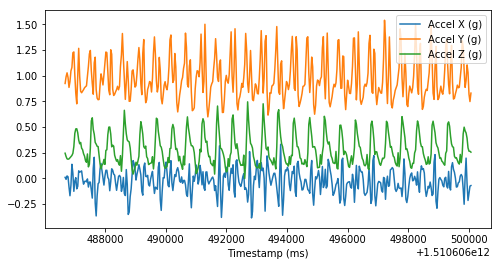

In [14]:
# task='WALKING'
sensor='accel'
loc = 'sacrum'
act_dict[task][0][loc][sensor].plot(figsize=(8,4))
ax = plt.ylim[-1,1]

TypeError: 'function' object is not subscriptable

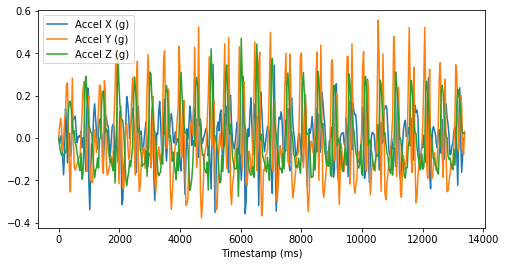

In [11]:
# HP filter

# task='WALKING'
sensor='accel'
loc = 'sacrum'
HPfilter(act_dict, task=task, loc=loc)
act_dict[task][0][loc][sensor].plot(figsize=(8,4))
ax = plt.ylim[-1,1]

### Compute power spectra with Welch method

In [30]:
rawdata = clip_data[0][sensor]['data'][0] #trial-sensor-clip#

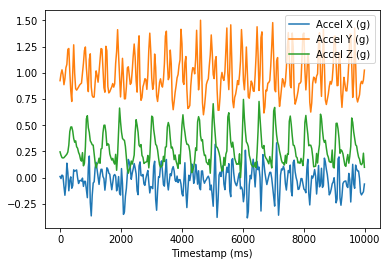

In [32]:
rawdata.plot()

In [33]:
Pxx = power_spectra_welch(rawdata,fm=0,fM=10)

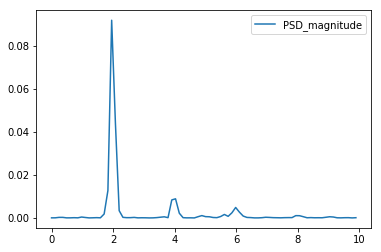

In [34]:
Pxx.plot()

In [35]:
np.nanmean(Pxx.values)

0.002445901749892828

In [37]:
# changed argmax to idxmax due to warning
domfreq = np.asarray([Pxx.iloc[:,-1].idxmax()])
Pdom_rel = Pxx.loc[domfreq].iloc[:,-1].values/Pxx.iloc[:,-1].sum() #power at dominant freq rel to total

In [38]:
x = rawdata.iloc[:,1]
Fs = np.mean(1/(np.diff(x.index)/1000)) #sampling rate in clip
print(Fs)

31.23785936285936


In [39]:
sH_raw=[]
sH_raw.append(nolds.sampen(x)) #samp entr raw data

In [40]:
sH_raw

[1.2833463918674481]

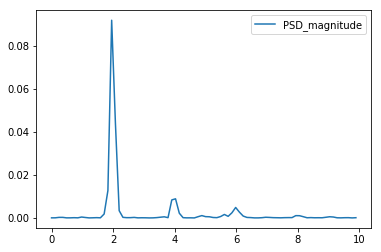

In [41]:
fm = 0; fM = 10
rawdata = clip_data[0][sensor]['data'][0] #trial-sensor-clip#
x = rawdata.iloc[:,-1]
n = len(x) #number of samples in clip
Fs = np.mean(1/(np.diff(x.index)/1000)) #sampling rate in clip
f,Pxx_den = welch(x,Fs,nperseg=min(256,n))
#return PSD in desired interval of freq
inds = (f<=fM)&(f>=fm)
f=f[inds]
Pxx_den=Pxx_den[inds]
Pxxdf = pd.DataFrame(data=Pxx_den,index=f,columns=['PSD_magnitude'])
Pxxdf.plot()

In [42]:
Pxxdf.head()

,PSD_magnitude
0.000000,0.000033
0.122023,0.000048
0.244046,0.000251
0.366069,0.000249
0.488092,0.000029


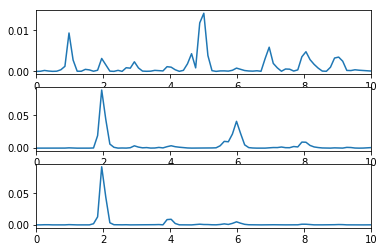

In [43]:
#signal features#signal  
rawdata = clip_data[0][sensor]['data'][0] #trial-sensor-clip#
fig = plt.figure()
# fp, ax_arr = plt.subplots(3, sharex=True)

for i in range(3):
    fig.add_subplot(3,1,i+1)
    x = rawdata.iloc[:,i]
    n = len(x) #number of samples in clip
    Fs = np.mean(1/(np.diff(x.index)/1000)) #sampling rate in clip
    f,Pxx_den = welch(x,Fs,nperseg=256)
    plt.plot(f,Pxx_den)
#     plt.semilogy(f,Pxx_den)
    plt.xlim([0,10])

# Aggregate features data with scores for given task - cycle through all subjects

DataPreprocessor2_wTime.ipynb

Data structure: 
- act_dict[task][trial][sensor]

for s in subjects:
1. aggregate raw data
- load subject file
- choose task and sensor location
- extract clips
2. feature extraction
- compute features on each trial
- Aggregate subj code (OMIT and score) with feature matrix

## 1. Generate clips and aggregate raw data
- performed only on HC02 below
- need to remove line to get all subjects


In [27]:
tasks = ['LYING','SITTING','STANDING','WALKING','STAIRS DOWN','STAIRS UP']

In [28]:
locs = ['bicep_left',
        'bicep_right',
        'posterior_forearm_left',
        'posterior_forearm_right',
        'medial_chest',
        'sacrum',
        'rectus_femoris_left',
        'rectus_femoris_right'
        'biceps_femoris_left',
        'biceps_femoris_right',
        'tibialis_anterior_left',
        'tibialis_anterior_right',
        'gastrocnemius_left',
        'gastrocnemius_right',
        'distal_lateral_shank_left',
        'distal_lateral_shank_right']
# if need to get locations again
# path = r'//FS2.smpp.local\RTO\Inpatient Sensors -Stroke\Data\biostamp_data\controls\HC01'
# locations = [locs for locs in os.listdir(path) if os.path.isdir(os.path.join(path, locs))]

# If need to select a subgroup of sensors:
# locs = ['sacrum','distal_lateral_shank_left','distal_lateral_shank_right'] #sensor location

In [41]:
def DataAggregator_allLocs(tasks,clipsize=10000,overlap=0.9,locations=[],namesuffix=None,verbose=False):
# omitted arg: task_scores_all
    """
    Function: aggregate metadata and rawdata from all sensor (accel,gyro) locations
    Rawdata is clipped into sliding windows, so incorporates code from gen_clips()
    Metadata includes Subject, Trial, and Task
    
    startTS and endTS specificies fraction of raw sensors data to use to generate clips
    """

    t0=time.time()
#     #load subject scores (std motor assessments)
#     mot_scores = pd.read_excel(os.path.join(scores_path, 'Scores.xls'))

    #load subjects features data and assemble with scores/subj metadata
    d = os.listdir(dict_path)
    fnames = [filename[0:12] for filename in d if filename.startswith('HC')]
    
    ############################
    #test only on 1st subject (TO DEBUG) which should be HC02
    # skip HC01 - need to debug
    # Comment out section to run all subjects
    ############################
#    fnames=[fnames[0]]
    fnames = ['HC02dict.pkl']
    print('\nThe one subject we are testing on: ',fnames)

    clip_data = pd.DataFrame() #the table with features and metadata

    #loop through subjects
    print(fnames)
    for subj_filename in fnames:

        #load current subject sensor data
        subj = int(subj_filename[2:4]) #subj numerical code
        f = open(os.path.join(dict_path,subj_filename),'rb')    
        act_dict = pickle.load(f)
        f.close()
        print('\nLoaded Subj %s sensor data'%subj)

#         act_dict_left = gen_unimodal_data(act_dict_full, side='left')
#         act_dict_right = gen_unimodal_data(act_dict_full, side='right')

# Data structure: act_dict[task][trial][sensor]

        #loop through tasks for current subject
        for task in tasks: 

#             print('\nTask is ', task)

# discard side, so removed 1 indent
#            for side in ['left','right']:

            #select trials
            Trials = act_dict[task].keys()
            n_rec = len(Trials) #of sensor recordings

######################
# Note: gen_clips function starts around here...
######################
            #****EXTRACT RAW CLIPS FROM ALL LOCATIONS FOR CURRENT TRIAL AND APPEND***
            for trial in Trials:
#                 print('\nTrial is ', trial)

                clip_data_trial=pd.DataFrame() #storing all clips from current trial and side

                locs = act_dict[task][trial].keys()
#                 #choose to extract from all locations or only the ones contained in locations
#                 if len(locations) == 0: #all locations
#                     locs = act_dict[task][trial].keys()
#                     locs = [i for i in locs if (i.find(side)>0)] #choose sensors on current side
#                     locs.append('sacrum'); locs.append('medial_chest')
#                 else: #selected locations + Sacrum
#                     locs = locations
#                     locs = [i for i in locs if (i.find(side)>0)] #choose sensors on current side 
#                     locs.append('sacrum')


                # separating the side for locs..
                for location in locs:
#                     print('\nLocation is ', location)

                    for s in ['accel','gyro']:
#                         print('\nSensor is ', s)

                        if verbose:
                            print(task,' sensortype = %s - trial %d'%(s,trial))
                        #create clips and store in a list
                        rawdata = act_dict[task][trial][location][s].copy()
                        if rawdata.empty is True: #skip if no data for current sensor
                            continue
                        #reindex time (relative to start)
                        idx = rawdata.index
                        idx = idx-idx[0]
                        rawdata.index = idx
                        #create clips data
                        deltat = np.median(np.diff(rawdata.index))
                        clips = pd.DataFrame()

#################################
# Fine above
# WOrk on below
                        #take clips
#                             location_name = re.sub(side, '', location) #column name dataframe (remove side info)
                        # kept side for location name
                        location_name = location

                        idx = np.arange(0,rawdata.index[-1],clipsize*(1-overlap))
                        for i in idx:
                            c = (rawdata[(rawdata.index>=i) & (rawdata.index<i+clipsize)]).copy()
                            #add time information to clips
                            c['Time']=(c.index.values/1000)-(c.index.values/1000)[0]
#                             df = pd.DataFrame({location_name+'_'+s:[c.values]},index=[trial])
                            ##############
                            # Changed dataframe structure to parse our location, sensor, and raw data in unstacked form
                            df = pd.DataFrame({'location':location_name,'sensor':s,'rawdata':[c.values]})
                            clips=pd.concat((clips,df)) #concatenate clips from current trial

#                         ## keep this chunk and evaluate further if statements print
#                         nc = len(clips)
#                         if (nc < clip_data_trial.shape[0]) & (clip_data_trial.empty is False):
#                             print(trial,location+s,len(clips))
#                             nd = clip_data_trial.shape[0]-nc
#                             print('current sensor has less clips - adding %d empties'%nd)
#                             clips=pd.concat((clips,pd.DataFrame({location_name+'_'+s:np.empty(nd)},
#                                                                 index=[np.ones(nd)*trial])))
#                         if (nc > clip_data_trial.shape[0]) & (clip_data_trial.empty is False):
#                             print(trial,location+s,len(clips))
#                             nd = nc-clip_data_trial.shape[0]
#                             print('current sensor has more clips - discarding last %d clips'%nd)
#                             clips = clips.iloc[:-nd]
#                         # end of chunk #######

                        # may discard
#                         clips.reset_index(inplace=True, drop=True)  # temp fix unique indexing bug from gen_unimodal_data
#                                                                     # will look into, added 3/19/2018

                        clip_data_trial=pd.concat((clip_data_trial,clips),axis=1) #concatenate clips across locations

                #concatenates metadata to all clips for current trial
                clip_data_trial['Subject']=subj
                clip_data_trial['Task']=task
#                 clip_data_trial['Side']=side
                clip_data_trial['Trial']=trial #subj_score.iloc[visit]['visit']

                ####### error here ############
                clip_data = pd.concat((clip_data,clip_data_trial)) #concatenate clips across visits (index) 
# end of removed indent

    #SAVING DATA 
    metadata = ['Subject','Trial','Task']
    cols = clip_data.columns.tolist()
    cols = np.setdiff1d(cols,metadata).tolist()
    clip_data = clip_data[metadata+cols]
    print('\nClip Data matrix generated')
    print(clip_data.shape)

    if namesuffix == None:
        namesuffix=''
    saved_filename = 'DataRaw_AllLocs'+namesuffix+'.hdf5'
    clip_data.to_hdf(os.path.join(features_path,saved_filename),'w')
    print('Data matrix saved in ' + str(os.path.join(features_path,saved_filename)))
    t = time.time()
    eltime = (t-t0)/60
    print('Elapsed time = %.2f min'%eltime)

    return clip_data

# Test DataAggregator_allLocs()

In [42]:
# test out DataAggregator_allLocs
data = DataAggregator_allLocs(tasks,locations=locs,overlap=0.9,namesuffix='Test')


The one subject we are testing on:  ['HC02dict.pkl']
['HC02dict.pkl']

Loaded Subj 2 sensor data


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:148: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



ValueError: Plan shapes are not aligned

In [37]:
data.head(5)

,Subject,Trial,Task,bicep_left_accel,bicep_right_accel,biceps_femoris_left_accel,biceps_femoris_right_accel,distal_lateral_shank_left_accel,distal_lateral_shank_left_gyro,distal_lateral_shank_right_accel,...,posterior_forearm_left_accel,posterior_forearm_left_gyro,posterior_forearm_right_accel,posterior_forearm_right_gyro,rectus_femoris_left_accel,rectus_femoris_right_accel,sacrum_accel,sacrum_gyro,tibialis_anterior_left_accel,tibialis_anterior_right_accel
0,2,0,LYING,"[[-0.38129243915465016, 0.14459449149309567, 0...","[[-0.3920347905699244, -0.17718776226443864, 0...","[[0.1582665751125356, 0.12408636606393485, -0....","[[0.11334401464866062, 0.014709697108415297, -...","[[0.09527733272297212, -0.8621347371633479, -0...","[[1.1291676203554744, 0.7629510948347615, 1.00...","[[0.10528725108720494, 0.9057145037003131, -0....",...,"[[-0.08490119783321902, 0.9057145037003131, -0...","[[-1.3122758831159445, -1.4343480582895154, -0...","[[0.06646829938200938, -0.721141374837873, -0....","[[0.9460593575952316, 1.0070954451819034, -0.6...","[[-0.1850003814755472, -0.1854886701762415, 1....","[[-0.2367589837491417, 0.06060883497367797, 1....","[[-0.059754329747462975, 0.1826810101472498, -...","[[0.9460593575952316, 0.3356984817273769, 1.06...","[[-0.046814679179064456, -0.8983901731898984, ...","[[-0.19964904249637616, 0.9004654001678496, 0...."
1,2,0,LYING,"[[-0.3788509956511788, 0.13238727397573855, 0....","[[-0.39935912108033866, -0.17132829785610726, ...","[[0.1553368429083699, 0.12603952086671288, -0....","[[0.11334401464866062, 0.005920500495918191, -...","[[0.09430075532158357, -0.8609140154116122, -0...","[[1.1902037079423735, 0.8850232700083325, 1.06...","[[0.10565346761272564, 0.9057145037003131, -0....",...,"[[-0.08111696040283832, 0.904859998474098, -0....","[[0.09155413138023503, -1.3122758831159445, -0...","[[0.06561379415579438, -0.7190661478599223, -0...","[[0.09155413138023503, 0.8850232700083325, -0....","[[-0.19476615548943327, -0.1957427328908219, 1...","[[-0.24164187075608454, 0.053284504463263715, ...","[[-0.059998474097810124, 0.1814602883955141, -...","[[0.9460593575952316, 0.3356984817273769, 1.06...","[[-0.052185854886701584, -0.9052262149996184, ...","[[-0.1981841763942933, 0.9063248645761809, 0.4..."
2,2,0,LYING,"[[-0.3768978408484016, 0.13336385137712714, 0....","[[-0.38129243915465016, -0.1820706492713815, 0...","[[0.1616845960173956, 0.1201800564583806, -0.9...","[[0.12164492256046346, 0.007873655298695327, -...","[[0.09527733272297212, -0.8617685206378272, -0...","[[1.2512397955290453, 0.7629510948347615, 1.06...","[[0.10663004501411423, 0.9074235141527432, -0....",...,"[[-0.08075074387731762, 0.9019302662699324, -0...","[[-0.8850232700083325, -1.3733119707026162, -0...","[[0.06695658808270366, -0.7221179522392616, -0...","[[0.5188067444876197, 0.9460593575952316, -0.7...","[[-0.19427786678873904, -0.1850003814755472, 1...","[[-0.2435950255588617, 0.06353856717784367, 1....","[[-0.05902189669642155, 0.18158236057068766, -...","[[0.9460593575952316, 0.3356984817273769, 1.00...","[[-0.051697566186007286, -0.899366750591287, 0...","[[-0.1986724650949876, 0.9156023498893724, 0.4..."
3,2,0,LYING,"[[-0.38471046005951015, 0.13678187228198713, 0...","[[-0.3876401922636759, -0.18060578316929865, 0...","[[0.15777828641184133, 0.11969176775768632, -0...","[[0.11334401464866062, 0.009338521400778177, -...","[[0.09539940489814568, -0.860669871061265, -0....","[[1.1291676203554744, 0.8239871824216607, 1.00...","[[0.10467689021133708, 0.9055924315251396, -0....",...,"[[-0.08136110475318548, 0.9047379262989246, -0...","[[-1.0070954451819034, -1.3733119707026162, -0...","[[0.06463721675440581, -0.7215075913633937, -0...","[[0.5798428320745188, 0.8850232700083325, -0.7...","[[-0.2016021972991533, -0.18744182497901865, 1...","[[-0.244083314259556, 0.06060883497367797, 0.9...","[[-0.060975051499198685, 0.18207064927138195, ...","[[0.9460593575952316, 0.3356984817273769, 1.00...","[[-0.05365072098878443, -0.902784771496146

In [38]:
data.shape

(796, 24)

In [18]:
# Raw data from all sensors aggregated for subject HC02
# features_path = r'//FS2.smpp.local\RTO\Inpatient Sensors -Stroke\Data\biostamp_data\FeatureMatrix'
data2 = pd.read_hdf(os.path.join(features_path,'DataRaw_AllLocsHC02.hdf5'))

# Something's wrong. Too many rows for Lying?

In [20]:
data2.columns

Index(['Subject', 'Trial', 'Task', 'bicep_left_accel', 'bicep_right_accel',
       'biceps_femoris_left_accel', 'biceps_femoris_right_accel',
       'distal_lateral_shank_left_accel', 'distal_lateral_shank_left_gyro',
       'distal_lateral_shank_right_accel', 'distal_lateral_shank_right_gyro',
       'gastrocnemius_left_accel', 'gastrocnemius_right_accel',
       'medial_chest_accel', 'posterior_forearm_left_accel',
       'posterior_forearm_left_gyro', 'posterior_forearm_right_accel',
       'posterior_forearm_right_gyro', 'rectus_femoris_left_accel',
       'rectus_femoris_right_accel', 'sacrum_accel', 'sacrum_gyro',
       'tibialis_anterior_left_accel', 'tibialis_anterior_right_accel'],
      dtype='object')

In [23]:
data2.tail(20)

,Subject,Trial,Task,bicep_left_accel,bicep_right_accel,biceps_femoris_left_accel,biceps_femoris_right_accel,distal_lateral_shank_left_accel,distal_lateral_shank_left_gyro,distal_lateral_shank_right_accel,...,posterior_forearm_left_accel,posterior_forearm_left_gyro,posterior_forearm_right_accel,posterior_forearm_right_gyro,rectus_femoris_left_accel,rectus_femoris_right_accel,sacrum_accel,sacrum_gyro,tibialis_anterior_left_accel,tibialis_anterior_right_accel
3,2,3,WALKING,NaN,NaN,NaN,NaN,"[[-1.1021286335545892, 0.6624246585793854, -0....","[[91.0353246356908, 18.219272144655406, 226.65...","[[-1.2904859998474096, 0.2820477607385365, -0....",...,"[[-2.0629587243457688, 0.8958266575112539, 0.1...","[[-43.060959792477426, 22.49179827573039, -108...","[[-1.6245975432974746, 0.09063859006637642, -0...","[[145.78469520103772, 31.464103150987967, 19.1...",NaN,NaN,"[[-0.1102922102693218, 0.8883802548256661, 0.6...","[[67.90264744029946, 38.8494697489889, -71.076...",NaN,NaN
4,2,3,WALKING,NaN,NaN,NaN,NaN,"[[-0.2108796826123447, -0.5097123674372472, -0...","[[-3.7537193865873633, -15.289539940489705, -5...","[[-0.9333028152895396, 0.06036469062333082, -0...",...,"[[-0.8153810940718702, 0.20965896086060895, -0...","[[109.16304264896645, -21.57625696192872, -100...","[[-1.161089494163424, -0.4804150453955902, -0....","[[5.95101853971164, -25.72671091783013, -137.1...",NaN,NaN,"[[-0.4475776302738996, 0.8487067978942546, 0.2...","[[2.5329976348516543, -39.88708323796459, -28....",NaN,NaN
5,2,3,WALKING,NaN,NaN,NaN,NaN,"[[-1.020950637064164, 0.09515526054779856, -0....","[[-28.656443121995835, -12.787060349431613, 53...","[[-2.3621576256961934, -1.157671473258564, -0....",...,"[[-0.9373311970702676, 0.1284809643701843, -0....","[[-40.1922636758984, -35.67559319447628, 223.7...","[[-0.8108644235904476, -0.31219958800640857, -...","[[202.7924010070956, -2.105745021744042, 203.6...",NaN,NaN,"[[-0.07501335164415979, 0.7011215381094074, 0....","[[-16.083009079118032, -4.9134050507361735, -1...",NaN,NaN
6,2,3,WALKING,NaN,NaN,NaN,NaN,"[[-0.9828641184100101, 0.028625925078202382, -...","[[-51.66704814221407, 11.444266422522333, 104....","[[-0.2746013580529487, 0.4306095979247733, -0....",...,"[[-1.0758831158922717, 0.2904707408255129, -0....","[[95.97924773022078, 7.5379568169680615, 33.90...","[[-0.96235599298085, -0.0040894178683146265, -...","[[-81.69680323491252, -35.00419623102175, 100....",NaN,NaN,"[[-0.10528725108720538, 1.3622644388494694, 0....","[[12.420843823910902, -13.275349050125895, -32...",NaN,NaN
7,2,3,WALKING,NaN,NaN,NaN,NaN,"[[-1.102738994430457, -0.04608224612802303, -0...","[[-26.092927443350845, -13.763637750820179, 92...","[[-1.6769665064469366, -2.9477378500038145, 0....",...,"[[-0.6773174639505606, 0.13629358358129284, -0...","[[-9.430075532158297, -3.4485389486533222, 118...","[[-0.8117189288166626, -0.37628747997253376, -...","[[133.76058594644064, -5.828946364538068, 172....",NaN,NaN,"[[-0.07928587777523477, 0.9180437933928438, 0....","[[-18.280308232242305, 17.48683909361398, 3.81...",NaN,NaN
8,2,3,WALKING,NaN,NaN,NaN,NaN,"[[-0.4054627298390172, -0.20318913557640966, -...","[[8.270389868009488, 15.228503852903032, -255....","[[-1.0128938735027084, -0.0109254596780346, -0...",...,"[[-1.030106050202182, 0.20257877470054186, -0....","[[81.81887541008655, 21.51522087434182, -96.58...","[[-0.9973907072556648, -0.2520180056458381, -0...","[[-25.29945830472252, 36.835278858625095, -114...",NaN,NaN,"[[-0.12018005645838105, 0.6612039368276497, 0....","[[-14.496070801861606, -37.99496452277413, -22...",NaN,NaN
9,2,3,WALKING,NaN,NaN,NaN,NaN,"[[-1.0897993438620586, 0.07122911421377864, -0...","[[-39.337758449683406, -2.410925459678083, 47....","[[-1.7133440146486612, -2.8152895399404896, 0....",...,"[[-0.7992675669489584, 0.19647516594186326, -0...","[[-2.5940337224383256, -55.817502098115476, 20...","[[-0.6843976501106277, -0.2357824063477532, -0...","[[88.77698939497986, -19.50102998397801, 137.3...",NaN,NaN,"[[-0.04193179217212162, 

In [79]:
# Example of raw data aggregated for subject HC02
# would be same as loaded data2
data.head()

,Subject,Trial,Task,bicep_left_accel,bicep_right_accel,biceps_femoris_left_accel,biceps_femoris_right_accel,distal_lateral_shank_left_accel,distal_lateral_shank_left_gyro,distal_lateral_shank_right_accel,...,posterior_forearm_left_accel,posterior_forearm_left_gyro,posterior_forearm_right_accel,posterior_forearm_right_gyro,rectus_femoris_left_accel,rectus_femoris_right_accel,sacrum_accel,sacrum_gyro,tibialis_anterior_left_accel,tibialis_anterior_right_accel
0,2,0,LYING,"[[-0.38129243915465016, 0.14459449149309567, 0...","[[-0.3920347905699244, -0.17718776226443864, 0...","[[0.1582665751125356, 0.12408636606393485, -0....","[[0.11334401464866062, 0.014709697108415297, -...","[[0.09527733272297212, -0.8621347371633479, -0...","[[1.1291676203554744, 0.7629510948347615, 1.00...","[[0.10528725108720494, 0.9057145037003131, -0....",...,"[[-0.08490119783321902, 0.9057145037003131, -0...","[[-1.3122758831159445, -1.4343480582895154, -0...","[[0.06646829938200938, -0.721141374837873, -0....","[[0.9460593575952316, 1.0070954451819034, -0.6...","[[-0.1850003814755472, -0.1854886701762415, 1....","[[-0.2367589837491417, 0.06060883497367797, 1....","[[-0.059754329747462975, 0.1826810101472498, -...","[[0.9460593575952316, 0.3356984817273769, 1.06...","[[-0.046814679179064456, -0.8983901731898984, ...","[[-0.19964904249637616, 0.9004654001678496, 0...."
1,2,0,LYING,"[[-0.3764095521477073, 0.1079728389410235, 0.9...","[[-0.4042420080872815, -0.16302738994430446, 0...","[[0.16363775082017273, 0.11578545815213205, -0...","[[0.12359807736324058, 0.003967345693141056, -...","[[0.09564354924849283, -0.8621347371633479, -0...","[[1.1291676203554744, 0.7629510948347615, 1.00...","[[0.10614175631341992, 0.907179369802396, -0.3...",...,"[[-0.0838025482566569, 0.9033951323720152, -0....","[[-1.1902037079423735, -1.3122758831159445, -0...","[[0.06378271152819083, -0.718577859159228, -0....","[[0.8239871824216607, 1.0070954451819034, -0.7...","[[-0.19769588769359905, -0.1820706492713815, 1...","[[-0.237247272449836, 0.057679102769512276, 1....","[[-0.05902189669642155, 0.18341344319829125, -...","[[0.9460593575952316, 0.2746623941404778, 1.06...","[[-0.05120927748531301, -0.9022964827954528, 0...","[[-0.2055085069047076, 0.9121843289845124, 0.4..."
2,2,0,LYING,"[[-0.382757305256733, 0.13922331578545855, 0.9...","[[-0.38959334706645293, -0.17084000915541298, ...","[[0.16314946211947845, 0.122621499961852, -0.9...","[[0.10308995193408066, 0.015686274509803866, -...","[[0.09539940489814568, -0.8595712214847029, -0...","[[1.2512397955290453, 0.8239871824216607, 1.06...","[[0.10614175631341992, 0.9069352254520489, -0....",...,"[[-0.08233768215457404, 0.904859998474098, -0....","[[-0.6408789196611906, -1.3733119707026162, -0...","[[0.06561379415579438, -0.7213855191882201, -0...","[[0.6408789196611906, 0.8850232700083325, -0.6...","[[-0.1967193102922105, -0.18646524757763008, 1...","[[-0.24164187075608454, 0.057679102769512276, ...","[[-0.05914396887159513, 0.1835355153734648, -0...","[[0.9460593575952316, 0.3356984817273769, 1.06...","[[-0.049744411383230165, -0.904737926298924, 0...","[[-0.1986724650949876, 0.9092545967803468, 0.4..."
3,2,0,LYING,"[[-0.3822690165560387, 0.11725032425421487, 0....","[[-0.3876401922636759, -0.16644541084916442, 0...","[[0.16314946211947845, 0.12115663385976914, -0...","[[0.11236743724727204, 0.01617456321049815, -0...","[[0.09613183794918713, -0.8607919432364386, -0...","[[1.1902037079423735, 0.8239871824216607, 1.00...","[[0.1058976119630728, 0.9070572976272224, -0.3...",...,"[[-0.07891966124971406, 0.9032730601968416, -0...","[[-0.7629510948347615, -1.3733119707026162, -0...","[[0.06695658808270366, -0.7196765087357901, -0...","[[0.3967345693140487, 1.0681315327688026, -0.8...","[[-0.20404364080262472, -0.18304722667277007, ...","[[-0.23627069504844744, 0.04986648355840373, 1...","[[-0.058777752346074415, 0.18292515449759691, ...","[[0.9460593575952316, 0.3356984817273769, 1.00...","[[-0.047791256580453016, -0.89887846189059

In [ ]:
# reset index
datadata  = data.reset_index(drop=True)
data.head()

In [80]:
data.tail()

,Subject,Trial,Task,bicep_left_accel,bicep_right_accel,biceps_femoris_left_accel,biceps_femoris_right_accel,distal_lateral_shank_left_accel,distal_lateral_shank_left_gyro,distal_lateral_shank_right_accel,...,posterior_forearm_left_accel,posterior_forearm_left_gyro,posterior_forearm_right_accel,posterior_forearm_right_gyro,rectus_femoris_left_accel,rectus_femoris_right_accel,sacrum_accel,sacrum_gyro,tibialis_anterior_left_accel,tibialis_anterior_right_accel
1,2,0,STAIRS UP,"[[-0.8578622110322729, 0.2276035706111239, -0....","[[-1.2006408789196614, -0.5087357900358587, -0...","[[-0.9003433279926756, 0.13922331578545855, -0...","[[-0.2167391470206761, 0.8047608148317691, -0....","[[-1.942351415274281, -0.4491645685511561, -0....","[[-183.93224994277875, 60.39520866712428, 70.0...","[[-1.2904859998474096, -0.05279621576256943, -...",...,"[[-1.0015411612115663, 0.14544899671931066, -0...","[[-83.77203021286323, -65.40016784924093, -40....","[[-1.0952925917448693, -0.21857022964827968, -...","[[-78.70603494316015, 4.547188525215461, -33.8...","[[-1.5487907225146866, -0.014099336232547444, ...","[[-2.3866941329060807, -1.2045471885252157, -0...","[[-0.1610742351415273, 0.8272220950637061, 0.7...","[[11.932555123216614, 85.23689631494653, 56.24...","[[-1.9477225909819185, 0.02935835812924381, -0...","[[-1.3983978027008468, 0.4341496910048068, -0...."
2,2,0,STAIRS UP,"[[-0.8275883115892273, 0.17877470054169553, -0...","[[-0.7523918516823072, -0.3378347447928589, -0...","[[-0.7650873579003585, 0.19977111467154973, -0...","[[-1.08540474555581, 0.21100175478751826, -0.3...","[[-0.9792019531548029, 0.14056610971236785, -0...","[[-11.20012207217519, 4.547188525215461, -5.21...","[[0.1369039444571607, 0.5850308995193405, 0.16...",...,"[[-1.015823605706874, -0.09112687876707116, 0....","[[-13.763637750820179, -55.63439383535524, 128...","[[-0.9019302662699319, 0.27765316243228805, -0...","[[41.10780498970007, 4.730296787975932, -11.38...","[[-0.96235599298085, -0.2494544899671931, 0.12...","[[-0.9853055619134814, 0.15094224460212136, -0...","[[0.020447089341573133, 0.8954604409857332, 0....","[[10.589761196307336, 7.354848554207593, 20.59...","[[-1.0077668421454185, 0.10992599374380063, -0...","[[-0.024841687647821686, -0.06732280460822483,..."
0,2,1,STAIRS UP,NaN,NaN,NaN,NaN,"[[-1.2449530785076677, -0.0820935378042269, -0...","[[72.35828183413469, 52.76569771877621, 177.52...","[[-0.9807888914320592, 0.02532997634851597, -0...",...,"[[-1.0523231860837718, 0.2377355611505303, -0....","[[-155.06218051422888, 2.8992141603723667, 44....","[[-1.0475623712520026, -0.3019455252918286, -0...","[[-20.965896086060862, -17.120622568093268, 18...",NaN,NaN,"[[-0.13531700617990386, 0.98628213931487, 0.24...","[[-6.622415503166168, 1.0681315327688026, -22....",NaN,NaN
1,2,1,STAIRS UP,NaN,NaN,NaN,NaN,"[[-0.36786449988555736, -1.2874341954680704, 0...","[[-272.12939650568387, 119.17296101319927, 59....","[[-1.0146028839551384, 0.033997100785839514, 0...",...,"[[-1.327229724574655, 0.3294117647058821, 0.46...","[[-70.09994659342328, 117.7080949111164, -66.0...","[[-1.2207827878233006, -0.3441824979018846, -0...","[[-78.9501792935073, -22.369726100556818, -154...",NaN,NaN,"[[-0.2990157930876629, 0.6854962996871903, 0.2...","[[-14.618142977035177, 91.0353246356908, -12.7...",NaN,NaN
2,2,1,STAIRS UP,NaN,NaN,NaN,NaN,"[[-1.4510109102006563, -0.1957427328908219, 0....","[[-43.060959792477426, -52.27740901808193, 97....","[[-0.9429465171282524, 0.11224536507209848, -0...",...,"[[-1.227985046158541, 0.35138475623712484, -0....","[[52.58258945601574, 15.10643167772946, -149.0...","[[-1.2022278171969178, -0.01971465629053171, -...","[[38.8494697489889, 7.2327763790340205, -28.90...",NaN,NaN,"[[-0.3468680857557032, 0.941359578850996, 0.42...","[[11.139085984588293, -56.610971236743815, -5....",NaN,NaN


In [81]:
data.columns

Index(['Subject', 'Trial', 'Task', 'bicep_left_accel', 'bicep_right_accel',
       'biceps_femoris_left_accel', 'biceps_femoris_right_accel',
       'distal_lateral_shank_left_accel', 'distal_lateral_shank_left_gyro',
       'distal_lateral_shank_right_accel', 'distal_lateral_shank_right_gyro',
       'gastrocnemius_left_accel', 'gastrocnemius_right_accel',
       'medial_chest_accel', 'posterior_forearm_left_accel',
       'posterior_forearm_left_gyro', 'posterior_forearm_right_accel',
       'posterior_forearm_right_gyro', 'rectus_femoris_left_accel',
       'rectus_femoris_right_accel', 'sacrum_accel', 'sacrum_gyro',
       'tibialis_anterior_left_accel', 'tibialis_anterior_right_accel'],
      dtype='object')

In [82]:
data.sacrum_accel.iloc[0].shape

(313, 4)

In [84]:
data.sacrum_gyro.iloc[0].shape

(313, 4)

In [85]:
data.tibialis_anterior_left_accel.iloc[0].shape

(313, 4)

In [86]:
data.tibialis_anterior_right_accel.iloc[0].shape

(315, 4)

In [90]:
data.posterior_forearm_right_accel.iloc[0].shape

(313, 4)

# Data from all locations

## 2. feature extraction
- compute features on each trial
- Aggregate subj code (OMIT and score) with feature matrix



### load data and reconvert from dict to dataframe with metadata
f = open(os.path.join(features_path,'DataRaw_AllLocsHandsThighBack.pkl'),'rb')
data = pickle.load(f)
f.close()

f = open(os.path.join(features_path,'Features_AllLocsHandsThighBack.pkl'),'rb')
features = pickle.load(f)
f.close()

metadata = ['Subject','Visit','Side','Task','Tremor','Bradykinesia','Dyskinesia']
features_new = pd.concat([data[metadata],features],axis=1)

print('saving hdf file...')
features_new.to_hdf(os.path.join(features_path,'Features_AllLocsUnfiltered.hdf5'),'w')
print('hdf file saved in %s'%(features_path))

## Need to find how/where they made Feature_AllLocs...
checked:
https://github.com/kamshee/CIS_PD/blob/master/DataPreprocessor_AllLocs2.ipynb
https://github.com/kamshee/CIS_PD/blob/master/DataPreprocessor2_wTime.ipynb
https://github.com/kamshee/CIS_PD/blob/master/Training-Set-Selection.ipynb
https://github.com/kamshee/CIS_PD/blob/master/Models-Features-AndrewVer3.ipynb

### Task list
- transform column names of sensor locations to a single column - use Melt option
- discard empty values at this step?
- extract features from raw data
- BUT, need to combine acc and gyro into one row, maybe separate step
    - relabel colnames with 'acc' or 'gyr' appended
    - only ankle, wrist, and sacrum have gyr data - I'd have a problem with NANs for the rest of the sensors...
- current 3 options
    1. dataset only with ankle, wrist, and sacrum sensors - both acc and gyr features
    2. dataset with all sensors but only acc features
    3. change NaN to 0


In [10]:
# Raw data from all sensors aggregated for subject HC02
# features_path = r'//FS2.smpp.local\RTO\Inpatient Sensors -Stroke\Data\biostamp_data\FeatureMatrax'
data2 = pd.read_hdf(os.path.join(features_path,'DataRaw_AllLocsHC02.hdf5'))

In [11]:
data2.head()

,Subject,Trial,Task,bicep_left_accel,bicep_right_accel,biceps_femoris_left_accel,biceps_femoris_right_accel,distal_lateral_shank_left_accel,distal_lateral_shank_left_gyro,distal_lateral_shank_right_accel,...,posterior_forearm_left_accel,posterior_forearm_left_gyro,posterior_forearm_right_accel,posterior_forearm_right_gyro,rectus_femoris_left_accel,rectus_femoris_right_accel,sacrum_accel,sacrum_gyro,tibialis_anterior_left_accel,tibialis_anterior_right_accel
0,2,0,LYING,"[[-0.38129243915465016, 0.14459449149309567, 0...","[[-0.3920347905699244, -0.17718776226443864, 0...","[[0.1582665751125356, 0.12408636606393485, -0....","[[0.11334401464866062, 0.014709697108415297, -...","[[0.09527733272297212, -0.8621347371633479, -0...","[[1.1291676203554744, 0.7629510948347615, 1.00...","[[0.10528725108720494, 0.9057145037003131, -0....",...,"[[-0.08490119783321902, 0.9057145037003131, -0...","[[-1.3122758831159445, -1.4343480582895154, -0...","[[0.06646829938200938, -0.721141374837873, -0....","[[0.9460593575952316, 1.0070954451819034, -0.6...","[[-0.1850003814755472, -0.1854886701762415, 1....","[[-0.2367589837491417, 0.06060883497367797, 1....","[[-0.059754329747462975, 0.1826810101472498, -...","[[0.9460593575952316, 0.3356984817273769, 1.06...","[[-0.046814679179064456, -0.8983901731898984, ...","[[-0.19964904249637616, 0.9004654001678496, 0...."
1,2,0,LYING,"[[-0.3764095521477073, 0.1079728389410235, 0.9...","[[-0.4042420080872815, -0.16302738994430446, 0...","[[0.16363775082017273, 0.11578545815213205, -0...","[[0.12359807736324058, 0.003967345693141056, -...","[[0.09564354924849283, -0.8621347371633479, -0...","[[1.1291676203554744, 0.7629510948347615, 1.00...","[[0.10614175631341992, 0.907179369802396, -0.3...",...,"[[-0.0838025482566569, 0.9033951323720152, -0....","[[-1.1902037079423735, -1.3122758831159445, -0...","[[0.06378271152819083, -0.718577859159228, -0....","[[0.8239871824216607, 1.0070954451819034, -0.7...","[[-0.19769588769359905, -0.1820706492713815, 1...","[[-0.237247272449836, 0.057679102769512276, 1....","[[-0.05902189669642155, 0.18341344319829125, -...","[[0.9460593575952316, 0.2746623941404778, 1.06...","[[-0.05120927748531301, -0.9022964827954528, 0...","[[-0.2055085069047076, 0.9121843289845124, 0.4..."
2,2,0,LYING,"[[-0.382757305256733, 0.13922331578545855, 0.9...","[[-0.38959334706645293, -0.17084000915541298, ...","[[0.16314946211947845, 0.122621499961852, -0.9...","[[0.10308995193408066, 0.015686274509803866, -...","[[0.09539940489814568, -0.8595712214847029, -0...","[[1.2512397955290453, 0.8239871824216607, 1.06...","[[0.10614175631341992, 0.9069352254520489, -0....",...,"[[-0.08233768215457404, 0.904859998474098, -0....","[[-0.6408789196611906, -1.3733119707026162, -0...","[[0.06561379415579438, -0.7213855191882201, -0...","[[0.6408789196611906, 0.8850232700083325, -0.6...","[[-0.1967193102922105, -0.18646524757763008, 1...","[[-0.24164187075608454, 0.057679102769512276, ...","[[-0.05914396887159513, 0.1835355153734648, -0...","[[0.9460593575952316, 0.3356984817273769, 1.06...","[[-0.049744411383230165, -0.904737926298924, 0...","[[-0.1986724650949876, 0.9092545967803468, 0.4..."
3,2,0,LYING,"[[-0.3822690165560387, 0.11725032425421487, 0....","[[-0.3876401922636759, -0.16644541084916442, 0...","[[0.16314946211947845, 0.12115663385976914, -0...","[[0.11236743724727204, 0.01617456321049815, -0...","[[0.09613183794918713, -0.8607919432364386, -0...","[[1.1902037079423735, 0.8239871824216607, 1.00...","[[0.1058976119630728, 0.9070572976272224, -0.3...",...,"[[-0.07891966124971406, 0.9032730601968416, -0...","[[-0.7629510948347615, -1.3733119707026162, -0...","[[0.06695658808270366, -0.7196765087357901, -0...","[[0.3967345693140487, 1.0681315327688026, -0.8...","[[-0.20404364080262472, -0.18304722667277007, ...","[[-0.23627069504844744, 0.04986648355840373, 1...","[[-0.058777752346074415, 0.18292515449759691, ...","[[0.9460593575952316, 0.3356984817273769, 1.00...","[[-0.047791256580453016, -0.89887846189059

# There shouldn't be so many Trial 0...

In [12]:
data2.columns.values

array(['Subject', 'Trial', 'Task', 'bicep_left_accel',
       'bicep_right_accel', 'biceps_femoris_left_accel',
       'biceps_femoris_right_accel', 'distal_lateral_shank_left_accel',
       'distal_lateral_shank_left_gyro',
       'distal_lateral_shank_right_accel',
       'distal_lateral_shank_right_gyro', 'gastrocnemius_left_accel',
       'gastrocnemius_right_accel', 'medial_chest_accel',
       'posterior_forearm_left_accel', 'posterior_forearm_left_gyro',
       'posterior_forearm_right_accel', 'posterior_forearm_right_gyro',
       'rectus_femoris_left_accel', 'rectus_femoris_right_accel',
       'sacrum_accel', 'sacrum_gyro', 'tibialis_anterior_left_accel',
       'tibialis_anterior_right_accel'], dtype=object)

In [15]:
# melt option to unpivot sensor locations
columns = ['bicep_left_accel',
       'bicep_right_accel', 'biceps_femoris_left_accel',
       'biceps_femoris_right_accel', 'distal_lateral_shank_left_accel',
       'distal_lateral_shank_left_gyro',
       'distal_lateral_shank_right_accel',
       'distal_lateral_shank_right_gyro', 'gastrocnemius_left_accel',
       'gastrocnemius_right_accel', 'medial_chest_accel',
       'posterior_forearm_left_accel', 'posterior_forearm_left_gyro',
       'posterior_forearm_right_accel', 'posterior_forearm_right_gyro',
       'rectus_femoris_left_accel', 'rectus_femoris_right_accel',
       'sacrum_accel', 'sacrum_gyro', 'tibialis_anterior_left_accel',
       'tibialis_anterior_right_accel']
pd.melt(data2, id_vars=['Subject', 'Trial', 'Task'], value_vars=columns, var_name='locations', value_name='rawdata')

,Subject,Trial,Task,locations,rawdata
0,2,0,LYING,bicep_left_accel,"[[-0.38129243915465016, 0.14459449149309567, 0..."
1,2,0,LYING,bicep_left_accel,"[[-0.3764095521477073, 0.1079728389410235, 0.9..."
2,2,0,LYING,bicep_left_accel,"[[-0.382757305256733, 0.13922331578545855, 0.9..."
3,2,0,LYING,bicep_left_accel,"[[-0.3822690165560387, 0.11725032425421487, 0...."
4,2,0,LYING,bicep_left_accel,"[[-0.3822690165560387, 0.13922331578545855, 0...."
5,2,0,LYING,bicep_left_accel,"[[-0.3632257572289617, 0.1231097886625463, 0.9..."
6,2,0,LYING,bicep_left_accel,"[[-0.3739681086442359, 0.12603952086671288, 0...."
7,2,0,LYING,bicep_left_accel,"[[-0.3837338826581216, 0.13043411917296144, 0...."
8,2,0,LYING,bicep_left_accel,"[[-0.3749446860456245, 0.12652780956740714, 0...."
9,2,0,LYING,bicep_left_accel,"[[-0.3837338826581216, 0.12994583047226715, 0...."


# Check data

In [ ]:

datadata==DataAggregator_allLocsDataAgg (tasks,task_scores,overlap=0,namesuffix='FullDataset_Overlap')

In [ ]:
data =pd.read_hdf(os.path.join(features_path, 'DataRawFullDataset.hdf5'))

In [ ]:
datadata  =pd.read_hdf(os.path.join(features_path, '../FeatureMatrix/DataRaw_AllLocsFullDataset.hdf5'))

In [ ]:
datadata..headhead((33))

In [ ]:
print(len(data))
print(len(data.Subject.unique()))

# Extract features

In [ ]:
#rawdata is a numpy array
def feature_extraction_array(rawdata):

    if np.size(rawdata) == 1:
#         print('empty')
        return np.empty([])
    
    time = rawdata[:,-1]
    Fs = np.mean(1/(np.diff(time))) #mean sampling rate in clip

    #remove time column 
    if rawdata.shape[1] > 3:
        rawdata = rawdata[:,:-1] 
        
    #Root mean square of signal on each axis
    N = np.shape(rawdata)[0]
    RMS = 1/N*np.sqrt(np.asarray(np.sum(rawdata**2,axis=0)))

    #range on each axis
    min_xyz = np.min(rawdata,axis=0)
    max_xyz = np.max(rawdata,axis=0)
    r = np.asarray(max_xyz-min_xyz)

    #Moments on each axis
    mean = np.asarray(np.mean(rawdata,axis=0))
    var = np.asarray(np.std(rawdata,axis=0))
    sk = skew(rawdata)
    kurt = kurtosis(rawdata)

    #Cross-correlation between axes pairs
    xcorr_xy = np.correlate(rawdata[:,0],rawdata[:,1],mode='same')
    # xcorr_xy = xcorr_xy/np.abs(np.sum(xcorr_xy)) #normalize values
    xcorr_peak_xy = np.max(xcorr_xy)
    xcorr_lag_xy = (np.argmax(xcorr_xy))/np.shape(xcorr_xy)[0] #normalized lag

    xcorr_xz = np.correlate(rawdata[:,0],rawdata[:,2],mode='same')
    # xcorr_xz = xcorr_xz/np.abs(np.sum(xcorr_xz)) #normalize values
    xcorr_peak_xz = np.max(xcorr_xz)
    xcorr_lag_xz = (np.argmax(xcorr_xz))/np.shape(xcorr_xz)[0]

    xcorr_yz = np.correlate(rawdata[:,1],rawdata[:,2],mode='same')
    # xcorr_yz = xcorr_yz/np.abs(np.sum(xcorr_yz)) #normalize values
    xcorr_peak_yz = np.max(xcorr_yz)
    xcorr_lag_yz = (np.argmax(xcorr_yz))/np.shape(xcorr_yz)[0]

    #pack xcorr features
    xcorr_peak = np.array([xcorr_peak_xy,xcorr_peak_xz,xcorr_peak_yz])
    xcorr_lag = np.array([xcorr_lag_xy,xcorr_lag_xz,xcorr_lag_yz])

    #Dominant freq and relative magnitude (on acc magnitude)
    xnorm = np.linalg.norm(rawdata,axis=1)
    n = np.shape(xnorm)[0] #number of samples in clip
    f,Pxx = welch(xnorm,Fs,nperseg=min(256,n))
    Pxx=Pxx[(f > 0) & (f <= 10)] #frequency range between 0 and 10 Hz
    domfreq = f[Pxx.argmax()].reshape(-1)
    Pdom_rel = (max(Pxx)/np.sum(Pxx)).reshape(-1) #power at dominant freq rel to total

    #moments of PSD
    Pxx_moments = np.array([np.nanmean(Pxx),np.nanstd(Pxx),skew(Pxx),kurtosis(Pxx)])

    #moments of jerk magnitude
    jerk = np.diff(xnorm)
    jerk_moments = np.array([np.nanmean(jerk),np.nanstd(jerk),skew(jerk[~np.isnan(jerk)]),kurtosis(jerk[~np.isnan(jerk)])])

    #sample entropy raw data (magnitude) and FFT
    sH_raw = []; sH_fft = []

    for a in range(3):
        x = rawdata[:,a]
        n = np.shape(x)[0] #number of samples in clip
        sH_raw.append(nolds.sampen(x)) #samp entr raw data
        #for now disable SH on fft
        # f,Pxx_den = welch(x,Fs,nperseg=min(256,n/4))
        # sH_fft.append(nolds.sampen(Pxx_den)) #samp entr fft
    sH_raw=np.asarray(sH_raw)
    
    #Assemble features in array
    X = np.concatenate((RMS,r,mean,var,sk,kurt,xcorr_peak,xcorr_lag,domfreq,Pdom_rel,Pxx_moments,jerk_moments,sH_raw))
    return X

In [ ]:
# Modify...

# extract all data
t1 = time.time()
F = data.iloc[:,7:].applymap(feature_extraction_array)
dataF = data.iloc[:,:7]
dataF=pd.concat((dataF,F),axis=1)
print((time.time()-t1)/60)

In [ ]:
# Modify...

printprint(('saving hdf file...''saving  )
dataF.to_hdf(os.path.join(features_path,'Features_HP+LP.h5'),'w')
print('hdf file saved in %s'%(features_path))